# Capstone Project

### Hotel occupancy rate
---
The dataset contains some information about houtel occuapncy rate each year which includes many deails such as hotel_avg_daily_rate

Load the data and display the first 5 lines to show the basic information of the data

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
df = pd.read_csv('ei.csv')
attribute = []
df.head()

Year  Month  logan_passengers  logan_intl_flights  hotel_occup_rate  \
0  2013      1           2019662                2986             0.572   
1  2013      2           1878731                2587             0.645   
2  2013      3           2469155                3250             0.819   
3  2013      4           2551246                3408             0.855   
4  2013      5           2676291                3240             0.858   

   hotel_avg_daily_rate  total_jobs  unemp_rate  labor_force_part_rate  \
0            158.925868           0       0.071                  0.594   
1            165.497062           0       0.063                  0.591   
2            187.450000           0       0.061                  0.591   
3            233.435374           0       0.061                  0.593   
4            237.890210           0       0.069                  0.597   

   pipeline_unit  pipeline_total_dev_cost  pipeline_sqft  pipeline_const_jobs  \
0            329                 80000000         313107              241.600   
1            557                360700000        1001911             1089.314   
2            803                343200000         820556             1036.464   
3            325                150000000         350000              453.000   
4            122                222200000         457374              671.044   

   foreclosure_pet  foreclosure_deeds  med_housing_price  housing_sales_vol  \
0               44                 11             380000                405   
1               50                 10             359500                332   
2                6                  6             400000                479   
3               14                  8             403000                558   
4               12                  4             425500                809   

   new_housing_const_permits  new-affordable_housing_permits  
0                        534                             134  
1                        196                              13  
2                         12                               0  
3                         91                              24  
4                         63                               0

check if there is any white space in front of 'hotel_occup_rate'

In [27]:
df['hotel_occup_rate'][0]

0.5720000000000001

In [28]:
df['hotel_occup_rate'][0]

0.5720000000000001

In [30]:
df.dtypes

Year                                int64
Month                               int64
logan_passengers                    int64
logan_intl_flights                  int64
hotel_occup_rate                  float64
hotel_avg_daily_rate              float64
total_jobs                          int64
unemp_rate                        float64
labor_force_part_rate             float64
pipeline_unit                       int64
pipeline_total_dev_cost             int64
pipeline_sqft                       int64
pipeline_const_jobs               float64
foreclosure_pet                     int64
foreclosure_deeds                   int64
med_housing_price                   int64
housing_sales_vol                   int64
new_housing_const_permits           int64
new-affordable_housing_permits      int64
dtype: object

define two functions 

In [21]:
def getAttribute(df):
    for i in df:
        attribute.append(i)
    print(attribute)

In [12]:
def plot(name):
    df.head()
    df.groupby('Month').mean()
    rate=[]
    k=0
    for i in df[name]:
        if(k<12):
            rate.append(i)
            k+=1
    # print(rate)
    x=np.arange(0,12,1)
    plt.plot(x,rate,'r')
    plt.title(name+' /month')
    plt.xlabel('month')
    plt.ylabel(name)

In [25]:
getAttribute(df)

['Year', 'Month', 'logan_passengers', 'logan_intl_flights', 'hotel_occup_rate', 'hotel_avg_daily_rate', 'total_jobs', 'unemp_rate', 'labor_force_part_rate', 'pipeline_unit', 'pipeline_total_dev_cost', 'pipeline_sqft', 'pipeline_const_jobs', 'foreclosure_pet', 'foreclosure_deeds', 'med_housing_price', 'housing_sales_vol', 'new_housing_const_permits', 'new-affordable_housing_permits', 'Year', 'Month', 'logan_passengers', 'logan_intl_flights', 'hotel_occup_rate', 'hotel_avg_daily_rate', 'total_jobs', 'unemp_rate', 'labor_force_part_rate', 'pipeline_unit', 'pipeline_total_dev_cost', 'pipeline_sqft', 'pipeline_const_jobs', 'foreclosure_pet', 'foreclosure_deeds', 'med_housing_price', 'housing_sales_vol', 'new_housing_const_permits', 'new-affordable_housing_permits', 'Year', 'Month', 'logan_passengers', 'logan_intl_flights', 'hotel_occup_rate', 'hotel_avg_daily_rate', 'total_jobs', 'unemp_rate', 'labor_force_part_rate', 'pipeline_unit', 'pipeline_total_dev_cost', 'pipeline_sqft', 'pipeline_co

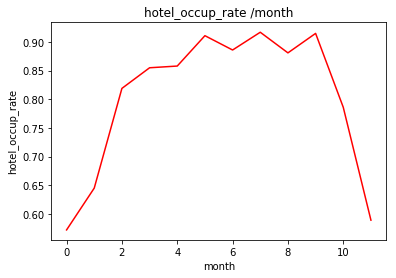

In [14]:
plot('hotel_occup_rate')

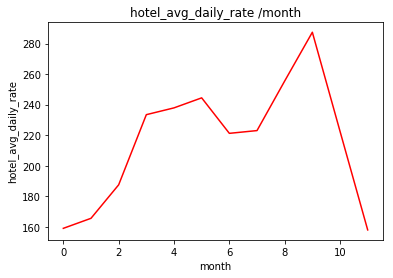

In [15]:
plot('hotel_avg_daily_rate')

In [45]:
df.hotel_occup_rate.describe()

count    25.00000
mean      0.77700
std       0.20212
min       0.00000
25%       0.64700
50%       0.85800
75%       0.90100
max       0.93100
Name: hotel_occup_rate, dtype: float64

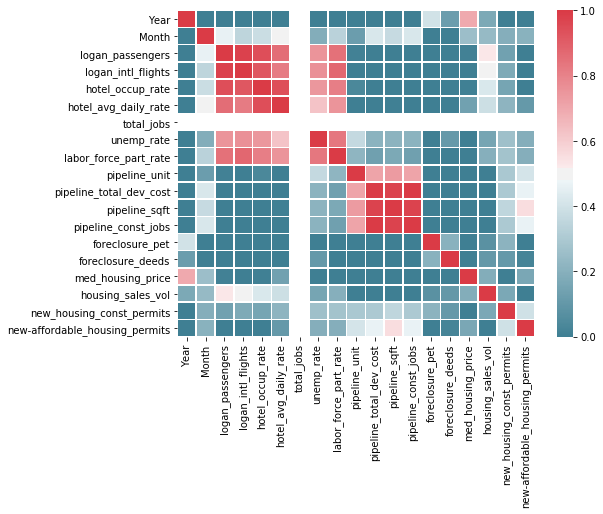

In [41]:
plt.subplots(figsize=(8,6))
cmap =sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), vmin=0, vmax=1, cmap=cmap, linewidths=.5)

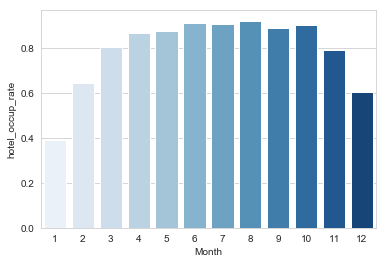

In [44]:
sns.set_style('whitegrid')
sns.barplot(data = df, x = 'Month', y='hotel_occup_rate', palette='Blues', ci=None)

In [47]:
#convert unordered categorical variable
month_d = pd.get_dummies(df.Month, prefix='Month')
month_d.head()

Month_1  Month_2  Month_3  Month_4  Month_5  Month_6  Month_7  Month_8  \
0        1        0        0        0        0        0        0        0   
1        0        1        0        0        0        0        0        0   
2        0        0        1        0        0        0        0        0   
3        0        0        0        1        0        0        0        0   
4        0        0        0        0        1        0        0        0   

   Month_9  Month_10  Month_11  Month_12  
0        0         0         0         0  
1        0         0         0         0  
2        0         0         0         0  
3        0         0         0         0  
4        0         0         0         0

In [49]:
# drop the first column
month_d.drop(month_d.columns[0], axis=1, inplace=True)
month_d.head()

Month_2  Month_3  Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  \
0        0        0        0        0        0        0        0        0   
1        1        0        0        0        0        0        0        0   
2        0        1        0        0        0        0        0        0   
3        0        0        1        0        0        0        0        0   
4        0        0        0        1        0        0        0        0   

   Month_10  Month_11  Month_12  
0         0         0         0  
1         0         0         0  
2         0         0         0  
3         0         0         0  
4         0         0         0

In [52]:
#concatenate the orginal house1 dataframe and the dummy dataframe
month_d1=pd.concat([df, month_d], axis =1)
month_d1.head()

Year  Month  logan_passengers  logan_intl_flights  hotel_occup_rate  \
0  2013      1           2019662                2986             0.572   
1  2013      2           1878731                2587             0.645   
2  2013      3           2469155                3250             0.819   
3  2013      4           2551246                3408             0.855   
4  2013      5           2676291                3240             0.858   

   hotel_avg_daily_rate  total_jobs  unemp_rate  labor_force_part_rate  \
0            158.925868           0       0.071                  0.594   
1            165.497062           0       0.063                  0.591   
2            187.450000           0       0.061                  0.591   
3            233.435374           0       0.061                  0.593   
4            237.890210           0       0.069                  0.597   

   pipeline_unit    ...     Month_3  Month_4  Month_5  Month_6  Month_7  \
0            329    ...           0        0        0        0        0   
1            557    ...           0        0        0        0        0   
2            803    ...           1        0        0        0        0   
3            325    ...           0        1        0        0        0   
4            122    ...           0        0        1        0        0   

   Month_8  Month_9  Month_10  Month_11  Month_12  
0        0        0         0         0         0  
1        0        0         0         0         0  
2        0        0         0         0         0  
3        0        0         0         0         0  
4        0        0         0         0         0  

[5 rows x 30 columns]

In [58]:
feature_cols = ['Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']
x=month_d1[feature_cols]
y=month_d1.hotel_occup_rate



In [61]:
lr=LinearRegression()
lr.fit(x, y)
list(zip(feature_cols, lr.coef_))

[('Month_2', 0.2536666666666666),
 ('Month_3', 0.41116666666666524),
 ('Month_4', 0.47666666666666646),
 ('Month_5', 0.4836666666666667),
 ('Month_6', 0.5186666666666664),
 ('Month_7', 0.5161666666666663),
 ('Month_8', 0.5291666666666662),
 ('Month_9', 0.4986666666666665),
 ('Month_10', 0.5091666666666665),
 ('Month_11', 0.39916666666666645),
 ('Month_12', 0.2121666666666663)]